In [1]:
import os
os.environ['PROJ_NETWORK'] = 'OFF'

In [2]:
import geopandas as gpd
import pandas as pd
from os import path, mkdir
import plotly.express as px
import mapboxgl as mbx
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [3]:
las_fn = path.join('zip://','initial_data','local_authorities.zip')
las = gpd.read_file(las_fn)
las.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [4]:
barnet = las[las.lad19nm=='Barnet'].to_crs(27700)

In [5]:
barnet

objectid    lad19cd lad19nm lad19nmw   bng_e   bng_n     long       lat  \
286       287  E09000003  Barnet     None  523472  191753 -0.21821  51.61108   

       st_areasha    st_lengths  \
286  8.674832e+07  50818.564021   

                                              geometry  
286  POLYGON ((524581.598 198355.622, 524596.003 19...

In [6]:
from shapely.geometry import box
barnet_bbox = gpd.GeoSeries(box(*barnet.total_bounds).buffer(10000))
barnet_bbox.name='geometry'
barnet_bbox = gpd.GeoDataFrame(barnet_bbox.to_frame().reset_index(), geometry=barnet_bbox.geometry)
barnet_bbox

index                                           geometry
0      0  POLYGON ((529581.802 175545.813, 517365.451 17...

<AxesSubplot:>

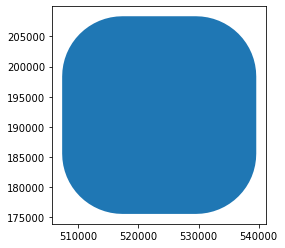

In [7]:
barnet_bbox.plot()

In [8]:
new_barnet_loc = Point(-0.1693069, 51.6526383)
cdh_loc = Point(-0.2008015,51.5622808)
libs = gpd.read_file(path.join('initial_data','libraries.json')).sort_values('library').reset_index().drop('index',axis=1)
libs = libs[libs.library!='East Barnet Library']
libs.loc[len(libs.index)+1] = ['New Barnet Library', new_barnet_loc]
# libs.loc[len(libs.index)+1] = ['Childs Hill Library', new_barnet_loc]
libs = libs.set_crs(4326).to_crs(27700)
libs

library                       geometry
0             Burnt Oak Library  POINT (520378.201 190802.400)
1           Childs Hill Library  POINT (524814.201 186351.300)
2       Chipping Barnet Library  POINT (524282.601 196779.700)
3             Colindale Library  POINT (521651.001 190676.000)
5         East Finchley Library  POINT (527026.449 189932.645)
6               Edgware Library  POINT (519597.501 192240.500)
7   Finchley Church End Library  POINT (525100.389 190551.373)
8         Golders Green Library  POINT (524714.301 187745.700)
9                Hendon Library  POINT (522785.299 189237.260)
10            Mill Hill Library  POINT (521746.001 192186.000)
11       North Finchley Library  POINT (526375.501 192663.700)
12               Osidge Library  POINT (528206.701 194018.200)
13         South Friern Library  POINT (528363.601 190693.500)
14           New Barnet Library  POINT (526743.962 196458.491)

In [9]:
types = {'Burnt Oak Library': 'core',
 'Childs Hill Library': 'partnership',
 'Chipping Barnet Library': 'core+',
 'Colindale Library': 'core+',
 'East Finchley Library': 'core',
 'Edgware Library': 'core+',
 'Finchley Church End Library': 'core+',
 'Golders Green Library': 'core',
 'Hendon Library': 'core',
 'Mill Hill Library': 'partnership',
 'North Finchley Library': 'core',
 'Osidge Library': 'core',
 'South Friern Library': 'partnership',
 'New Barnet Library': 'partnership'}
lib_types= pd.DataFrame({'library': types.keys(), 'type': types.values()})
libs = libs.merge(lib_types)

In [10]:
# libs.to_crs(4326).to_file(path.join('data','libraries.json'), driver='GeoJSON')

In [11]:
libs_radii = gpd.GeoDataFrame(libs, geometry=libs.buffer(1000))
libs_radii

library  \
0             Burnt Oak Library   
1           Childs Hill Library   
2       Chipping Barnet Library   
3             Colindale Library   
4         East Finchley Library   
5               Edgware Library   
6   Finchley Church End Library   
7         Golders Green Library   
8                Hendon Library   
9             Mill Hill Library   
10       North Finchley Library   
11               Osidge Library   
12         South Friern Library   
13           New Barnet Library   

                                             geometry         type  
0   POLYGON ((521378.201 190802.400, 521373.386 19...         core  
1   POLYGON ((525814.201 186351.300, 525809.386 18...  partnership  
2   POLYGON ((525282.601 196779.700, 525277.786 19...        core+  
3   POLYGON ((522651.001 190676.000, 522646.186 19...        core+  
4   POLYGON ((528026.449 189932.645, 528021.633 18...         core  
5   POLYGON ((520597.501 192240.500, 520592.686 19...        core+  
6   POLYGON ((526100.389 190551.373, 526095.574 19...        core+  
7   POLYGON ((525714.301 187745.700, 525709.486 18...         core  
8   POLYGON ((523785.299 189237.260, 523780.483 18...         core  
9   POLYGON ((522746.001 192186.000, 522741.186 19...  partnership  
10  POLYGON ((527375.501 192663.700, 527370.686 19...         core  
11  POLYGON ((529206.701 194018.200, 529201.886 19...         core  
12  POLYGON ((529363.601 190693.500, 529358.786 19...  partnership  
13  POLYGON ((527743.962 196458.491, 527739.147 19...  partnership

In [12]:
libs_radii.to_file(path.join('data','libs_radii.json'), driver='GeoJSON')

In [13]:
lsoas = gpd.read_file(path.join('zip://','initial_data', 'lsoas.zip')).to_crs(27700)

In [14]:
lsoas

OBJECTID   LSOA11CD                   LSOA11NM   BNG_E   BNG_N  \
0             1  E01000001        City of London 001A  532123  181632   
1             2  E01000002        City of London 001B  532480  181715   
2             3  E01000003        City of London 001C  532239  182033   
3             4  E01000005        City of London 001E  533581  181283   
4             5  E01000006  Barking and Dagenham 016A  544994  184274   
...         ...        ...                        ...     ...     ...   
34748     34749  W01001954               Cardiff 006F  312959  180574   
34749     34750  W01001955               Swansea 025F  265633  193182   
34750     34751  W01001956               Swansea 023E  260586  192621   
34751     34752  W01001957               Swansea 025G  265337  192555   
34752     34753  W01001958               Swansea 025H  266265  192630   

          LONG_      LAT    Shape_Leng    Shape__Are    Shape__Len  \
0     -0.097140  51.5182   2635.767993  1.298653e+05   2635.767993   
1     -0.091970  51.5188   2707.881853  2.284196e+05   2707.881853   
2     -0.095320  51.5217   1224.638192  5.905435e+04   1224.638192   
3     -0.076270  51.5147   2275.805348  1.895777e+05   2275.805348   
4      0.089317  51.5387   1966.092607  1.465370e+05   1966.092607   
...         ...      ...           ...           ...           ...   
34748 -3.255820  51.5173   5567.813286  6.400342e+05   5567.813286   
34749 -3.942370  51.6214   6037.602710  6.871190e+05   6037.602710   
34750 -4.015000  51.6151  13127.898240  2.500337e+06  13127.898240   
34751 -3.946400  51.6157   2829.597133  2.139171e+05   2829.597133   
34752 -3.933030  51.6166   4952.206534  3.120572e+05   4952.206534   

                                                geometry  
0      POLYGON ((532153.339 181867.677, 532154.301 18...  
1      POLYGON ((532636.307 181926.254, 532633.858 18...  
2      POLYGON ((532155.508 182165.404, 532160.055 18...  
3      POLYGON ((533620.885 181402.575, 533641.692 18...  
4      POLYGON ((545128.728 184311.010, 545147.089 18...  
...                                                  ...  
34748  POLYGON ((312746.693 181262.240, 312750.803 18...  
34749  POLYGON ((265803.429 194161.812, 265813.742 19...  
34750  POLYGON ((259959.676 194980.105, 259967.770 19...  
34751  POLYGON ((265152.763 192746.569, 265154.763 19...  
34752  POLYGON ((266192.763 193080.957, 266211.137 19...  

[34753 rows x 11 columns]

<AxesSubplot:>

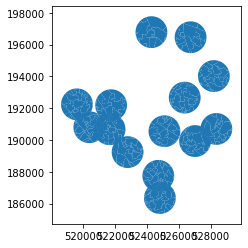

In [15]:
libs_lsoas = gpd.overlay(lsoas, libs, how='intersection')
libs_lsoas.plot()

In [16]:
# from geopandas.tools import sjoin
barnet_area_lsoas = gpd.overlay(lsoas, barnet_bbox.set_crs(27700), how='intersection')
barnet_area_lsoas

OBJECTID   LSOA11CD             LSOA11NM   BNG_E   BNG_N    LONG_  \
0            1  E01000001  City of London 001A  532123  181632 -0.09714   
1            2  E01000002  City of London 001B  532480  181715 -0.09197   
2            3  E01000003  City of London 001C  532239  182033 -0.09532   
3            4  E01000005  City of London 001E  533581  181283 -0.07627   
4          112  E01000115          Barnet 009A  528654  194683 -0.14233   
...        ...        ...                  ...     ...     ...      ...   
2833     32930  E01033709         Hackney 027H  532833  183021 -0.08639   
2834     32931  E01033710         Hackney 028E  535350  186836 -0.04866   
2835     32932  E01033711         Hackney 027I  532714  182812 -0.08819   
2836     32933  E01033712         Hackney 023G  534587  183752 -0.06084   
2837     32934  E01033713         Hackney 010G  534508  185706 -0.06123   

          LAT   Shape_Leng     Shape__Are   Shape__Len  index  \
0     51.5182  2635.767993  129865.314354  2635.767993      0   
1     51.5188  2707.881853  228419.634727  2707.881853      0   
2     51.5217  1224.638192   59054.351929  1224.638192      0   
3     51.5147  2275.805348  189577.710655  2275.805348      0   
4     51.6362  3328.923276  274048.836380  3328.923276      0   
...       ...          ...            ...          ...    ...   
2833  51.5305  2738.388826   87837.088089  2738.388826      0   
2834  51.5642  1175.784908   42292.109535  1175.784908      0   
2835  51.5286  2063.229488   77105.988251  2063.229488      0   
2836  51.5366  2450.132602  162358.794174  2450.132602      0   
2837  51.5542  2655.122652  261664.744789  2655.122652      0   

                                               geometry  
0     POLYGON ((532154.301 181864.743, 532164.292 18...  
1     POLYGON ((532633.858 181913.684, 532620.950 18...  
2     POLYGON ((532160.055 182151.311, 532160.591 18...  
3     POLYGON ((533641.692 181380.438, 533648.461 18...  
4     POLYGON ((528824.181 194807.243, 528827.045 19...  
...                                                 ...  
2833  POLYGON ((532721.026 183188.407, 532739.550 18...  
2834  POLYGON ((535494.029 186840.280, 535494.779 18...  
2835  POLYGON ((533056.832 182943.244, 533055.965 18...  
2836  POLYGON ((534777.877 184000.184, 534777.877 18...  
2837  POLYGON ((534919.950 185913.512, 534917.001 18...  

[2838 rows x 12 columns]

<AxesSubplot:>

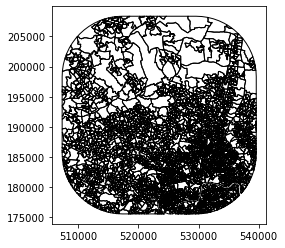

In [18]:
barnet_area_lsoas.plot(color='none',edgecolor='k')

In [19]:
# make the geometries full shapes again rather than clipped at the edge of the circle
libs_lsoas = libs_lsoas[['LSOA11CD','LSOA11NM','library']].merge(barnet_area_lsoas, how='outer')[['LSOA11CD','LSOA11NM','library', 'geometry']]
libs_lsoas

LSOA11CD      LSOA11NM         library  \
0     E01000115   Barnet 009A  Osidge Library   
1     E01000116   Barnet 009B  Osidge Library   
2     E01000117   Barnet 010A  Osidge Library   
3     E01000118   Barnet 010B  Osidge Library   
4     E01000119   Barnet 009C  Osidge Library   
...         ...           ...             ...   
2893  E01033709  Hackney 027H             NaN   
2894  E01033710  Hackney 028E             NaN   
2895  E01033711  Hackney 027I             NaN   
2896  E01033712  Hackney 023G             NaN   
2897  E01033713  Hackney 010G             NaN   

                                               geometry  
0     POLYGON ((528824.181 194807.243, 528827.045 19...  
1     POLYGON ((528294.377 194677.087, 528327.798 19...  
2     POLYGON ((527868.292 194356.847, 527866.805 19...  
3     POLYGON ((528102.860 194492.576, 528101.170 19...  
4     POLYGON ((529252.392 194414.772, 529250.809 19...  
...                                                 ...  
2893  POLYGON ((532721.026 183188.407, 532739.550 18...  
2894  POLYGON ((535494.029 186840.280, 535494.779 18...  
2895  POLYGON ((533056.832 182943.244, 533055.965 18...  
2896  POLYGON ((534777.877 184000.184, 534777.877 18...  
2897  POLYGON ((534919.950 185913.512, 534917.001 18...  

[2898 rows x 4 columns]

In [20]:
imd = pd.read_csv(path.join('initial_data', 'imd.csv'))
imd.rename({'LSOA code (2011)':'LSOA11CD', 'LSOA name (2011)':'LSOA11NM'}, axis=1, inplace=True)

In [21]:
imd = imd[[x for x in imd.columns if 'LSOA' in x or 'decile' in x.lower()]]
imd.columns = [x.replace(' Decile (where 1 is most deprived 10% of LSOAs)', '') for x in imd.columns]

In [22]:
# melt imd so it's long ways, and filter out any rows greater than 3
imd = pd.melt(imd, id_vars=imd.columns[:2], value_vars=imd.columns[2:]).query('value<3')

In [23]:
imd = imd[imd.LSOA11CD.isin(list(libs_lsoas.LSOA11CD.unique()))]
imd

LSOA11CD      LSOA11NM                             variable  value
117     E01000121   Barnet 010C  Index of Multiple Deprivation (IMD)      2
122     E01000126   Barnet 026A  Index of Multiple Deprivation (IMD)      2
146     E01000151   Barnet 026B  Index of Multiple Deprivation (IMD)      2
148     E01000153   Barnet 026D  Index of Multiple Deprivation (IMD)      2
216     E01000221   Barnet 039B  Index of Multiple Deprivation (IMD)      1
...           ...           ...                                  ...    ...
525444  E01033709  Hackney 027H                  Outdoors Sub-domain      1
525445  E01033710  Hackney 028E                  Outdoors Sub-domain      1
525446  E01033711  Hackney 027I                  Outdoors Sub-domain      1
525447  E01033712  Hackney 023G                  Outdoors Sub-domain      1
525448  E01033713  Hackney 010G                  Outdoors Sub-domain      1

[12150 rows x 4 columns]

In [24]:
records = imd.to_dict(orient='records')

In [25]:
count = imd.iloc[:, :3].groupby(['LSOA11CD','LSOA11NM']).count().rename({'variable':'count_of_variables'}, axis=1).reset_index()
count

LSOA11CD             LSOA11NM  count_of_variables
0     E01000001  City of London 001A                   2
1     E01000002  City of London 001B                   2
2     E01000003  City of London 001C                   4
3     E01000005  City of London 001E                   5
4     E01000115          Barnet 009A                   1
...         ...                  ...                 ...
2643  E01033709         Hackney 027H                   9
2644  E01033710         Hackney 028E                   4
2645  E01033711         Hackney 027I                   7
2646  E01033712         Hackney 023G                   8
2647  E01033713         Hackney 010G                   7

[2648 rows x 3 columns]

In [26]:
def _get_records(r):
    code = r['LSOA11CD']
    return [{'variable': x['variable'], 'value': x['value']} for x in records if x['LSOA11CD']==code]
count['record'] = count.apply(_get_records, axis=1)
count

LSOA11CD             LSOA11NM  count_of_variables  \
0     E01000001  City of London 001A                   2   
1     E01000002  City of London 001B                   2   
2     E01000003  City of London 001C                   4   
3     E01000005  City of London 001E                   5   
4     E01000115          Barnet 009A                   1   
...         ...                  ...                 ...   
2643  E01033709         Hackney 027H                   9   
2644  E01033710         Hackney 028E                   4   
2645  E01033711         Hackney 027I                   7   
2646  E01033712         Hackney 023G                   8   
2647  E01033713         Hackney 010G                   7   

                                                 record  
0     [{'variable': 'Wider Barriers Sub-domain', 'va...  
1     [{'variable': 'Wider Barriers Sub-domain', 'va...  
2     [{'variable': 'Barriers to Housing and Service...  
3     [{'variable': 'Income', 'value': 2}, {'variabl...  
4     [{'variable': 'Outdoors Sub-domain', 'value': 2}]  
...                                                 ...  
2643  [{'variable': 'Index of Multiple Deprivation (...  
2644  [{'variable': 'Barriers to Housing and Service...  
2645  [{'variable': 'Barriers to Housing and Service...  
2646  [{'variable': 'Index of Multiple Deprivation (...  
2647  [{'variable': 'Index of Multiple Deprivation (...  

[2648 rows x 4 columns]

In [27]:
count.query('count_of_variables>1').iloc[3]['record']

[{'variable': 'Income', 'value': 2},
 {'variable': 'Barriers to Housing and Services', 'value': 1},
 {'variable': 'Income Deprivation Affecting Older People (IDAOPI)',
  'value': 2},
 {'variable': 'Wider Barriers Sub-domain', 'value': 1},
 {'variable': 'Outdoors Sub-domain', 'value': 1}]

In [28]:
# final_gdf
gdf = libs_lsoas.merge(count)
gdf['record'] = gdf.record.astype(str)
gdf = gpd.overlay(gpd.GeoDataFrame(gdf, geometry=gdf.geometry, crs=27700), barnet_bbox.set_crs(27700), how='intersection').to_crs(4326)

# gdf= gpd.GeoDataFrame(gdf, geometry=gdf.geometry, crs=27700).to_crs(4326)
# gdf.to_file(path.join('data','data.json'), driver='GeoJSON')

In [29]:
gdf.to_file(path.join('data','data.json'), driver='GeoJSON')

In [30]:
libs.to_crs(4326).to_file(path.join('data','libraries.json'), driver='GeoJSON')
libs_radii.to_crs(4326).to_file(path.join('data','libs_radii.json'), driver='GeoJSON')

In [31]:
libs

library  \
0             Burnt Oak Library   
1           Childs Hill Library   
2       Chipping Barnet Library   
3             Colindale Library   
4         East Finchley Library   
5               Edgware Library   
6   Finchley Church End Library   
7         Golders Green Library   
8                Hendon Library   
9             Mill Hill Library   
10       North Finchley Library   
11               Osidge Library   
12         South Friern Library   
13           New Barnet Library   

                                             geometry         type  
0   POLYGON ((521378.201 190802.400, 521373.386 19...         core  
1   POLYGON ((525814.201 186351.300, 525809.386 18...  partnership  
2   POLYGON ((525282.601 196779.700, 525277.786 19...        core+  
3   POLYGON ((522651.001 190676.000, 522646.186 19...        core+  
4   POLYGON ((528026.449 189932.645, 528021.633 18...         core  
5   POLYGON ((520597.501 192240.500, 520592.686 19...        core+  
6   POLYGON ((526100.389 190551.373, 526095.574 19...        core+  
7   POLYGON ((525714.301 187745.700, 525709.486 18...         core  
8   POLYGON ((523785.299 189237.260, 523780.483 18...         core  
9   POLYGON ((522746.001 192186.000, 522741.186 19...  partnership  
10  POLYGON ((527375.501 192663.700, 527370.686 19...         core  
11  POLYGON ((529206.701 194018.200, 529201.886 19...         core  
12  POLYGON ((529363.601 190693.500, 529358.786 19...  partnership  
13  POLYGON ((527743.962 196458.491, 527739.147 19...  partnership

In [32]:
with open(path.join('data', 'barnet_bounds.json'), 'w') as f:
    f.write(barnet.to_crs(4326).bounds.to_json(orient='records'))

In [46]:
import json

In [50]:
# imd
def _make_html(df):
    def _lib_table(lib):
        gp = df[df.library==lib][['variable','value']].groupby('variable')
    return json.dumps({lib: _lib_table(lib) for lib in df.library.unique()})

json_string = _make_html(libs_lsoas[~libs_lsoas.library.isna()].merge(imd).drop('geometry', axis=1))

with open(path.join('data','libraries-html-table.json'), 'w') as f:
    f.write(json_string)